## **Import Libraries**

In [2]:
import os
import shutil
import itertools
import pathlib
from PIL import Image

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

## **Data Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/dataset"
#TRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/dataset/train/'
#TEST_PATH = '/content/drive/MyDrive/Colab Notebooks/dataset/test'
train_data_path = '/content/drive/MyDrive/Colab Notebooks/dataset/train/'
train_data_path = 'C:\\Users\\Seo\\Desktop\\Gits\\2024_06_Dron_Competition\\Data\\train'
filepaths =[]
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
df = pd.concat([Fseries , Lseries] , axis = 1)

In [4]:
df

filepaths      label
0     C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
1     C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
2     C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
3     C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
4     C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
...                                                 ...        ...
3046  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
3047  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
3048  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
3049  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
3050  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat

[3051 rows x 2 columns]

In [5]:
test_data_path = 'C:\\Users\\Seo\\Desktop\\Gits\\2024_06_Dron_Competition\\Data\\val'

filepaths =[]
labels = []
folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test = pd.concat([Fseries , Lseries] , axis = 1)
test

filepaths      label
0    C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
1    C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
2    C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
3    C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
4    C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
..                                                 ...        ...
795  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
796  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
797  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
798  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
799  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat

[800 rows x 2 columns]

In [6]:
valid_data_path = 'C:\\Users\\Seo\\Desktop\\Gits\\2024_06_Dron_Competition\\Data\\val'

filepaths =[]
labels = []
folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
valid = pd.concat([Fseries , Lseries] , axis = 1)
valid

filepaths      label
0    C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
1    C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
2    C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
3    C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
4    C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...  aeroplane
..                                                 ...        ...
795  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
796  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
797  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
798  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat
799  C:\Users\Seo\Desktop\Gits\2024_06_Dron_Competi...        cat

[800 rows x 2 columns]

In [7]:
fig= px.histogram(data_frame= df,
           y= df['label'],
           template='plotly_dark',
           color= df['label'].values,
           title='number of images in each class of the train data')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig= px.histogram(data_frame= test,
           y= test['label'],
           template='plotly_dark',
           color=test['label'].values,
           title='number of images in each class of the test data')
fig.show()

In [ ]:
fig= px.histogram(data_frame= valid,
           y= valid['label'],
           template='plotly_dark',
           color=valid['label'].values,
           title='number of images in each class of the valid data')
fig.show()

### All the images in class pneumonia in greater than class normal in the train, test and validation data frames

In [8]:
train_df, dummy_df = train_test_split(df, train_size=0.8, shuffle= True, random_state= 42)
valid_df, test_df= train_test_split(dummy_df, train_size= 0.6, shuffle= True, random_state= 42)

## **Image Data Generator**

In [9]:
img_size = (224 ,224)
batch_size = 16
img_shape= (img_size[0], img_size[1], 3)

def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)
valid_gen = ts_gen.flow_from_dataframe(valid_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)
test_gen = ts_gen.flow_from_dataframe(test_df , x_col= 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 2440 validated image filenames belonging to 8 classes.
Found 366 validated image filenames belonging to 8 classes.
Found 245 validated image filenames belonging to 8 classes.


## **Show Sample from the train data**

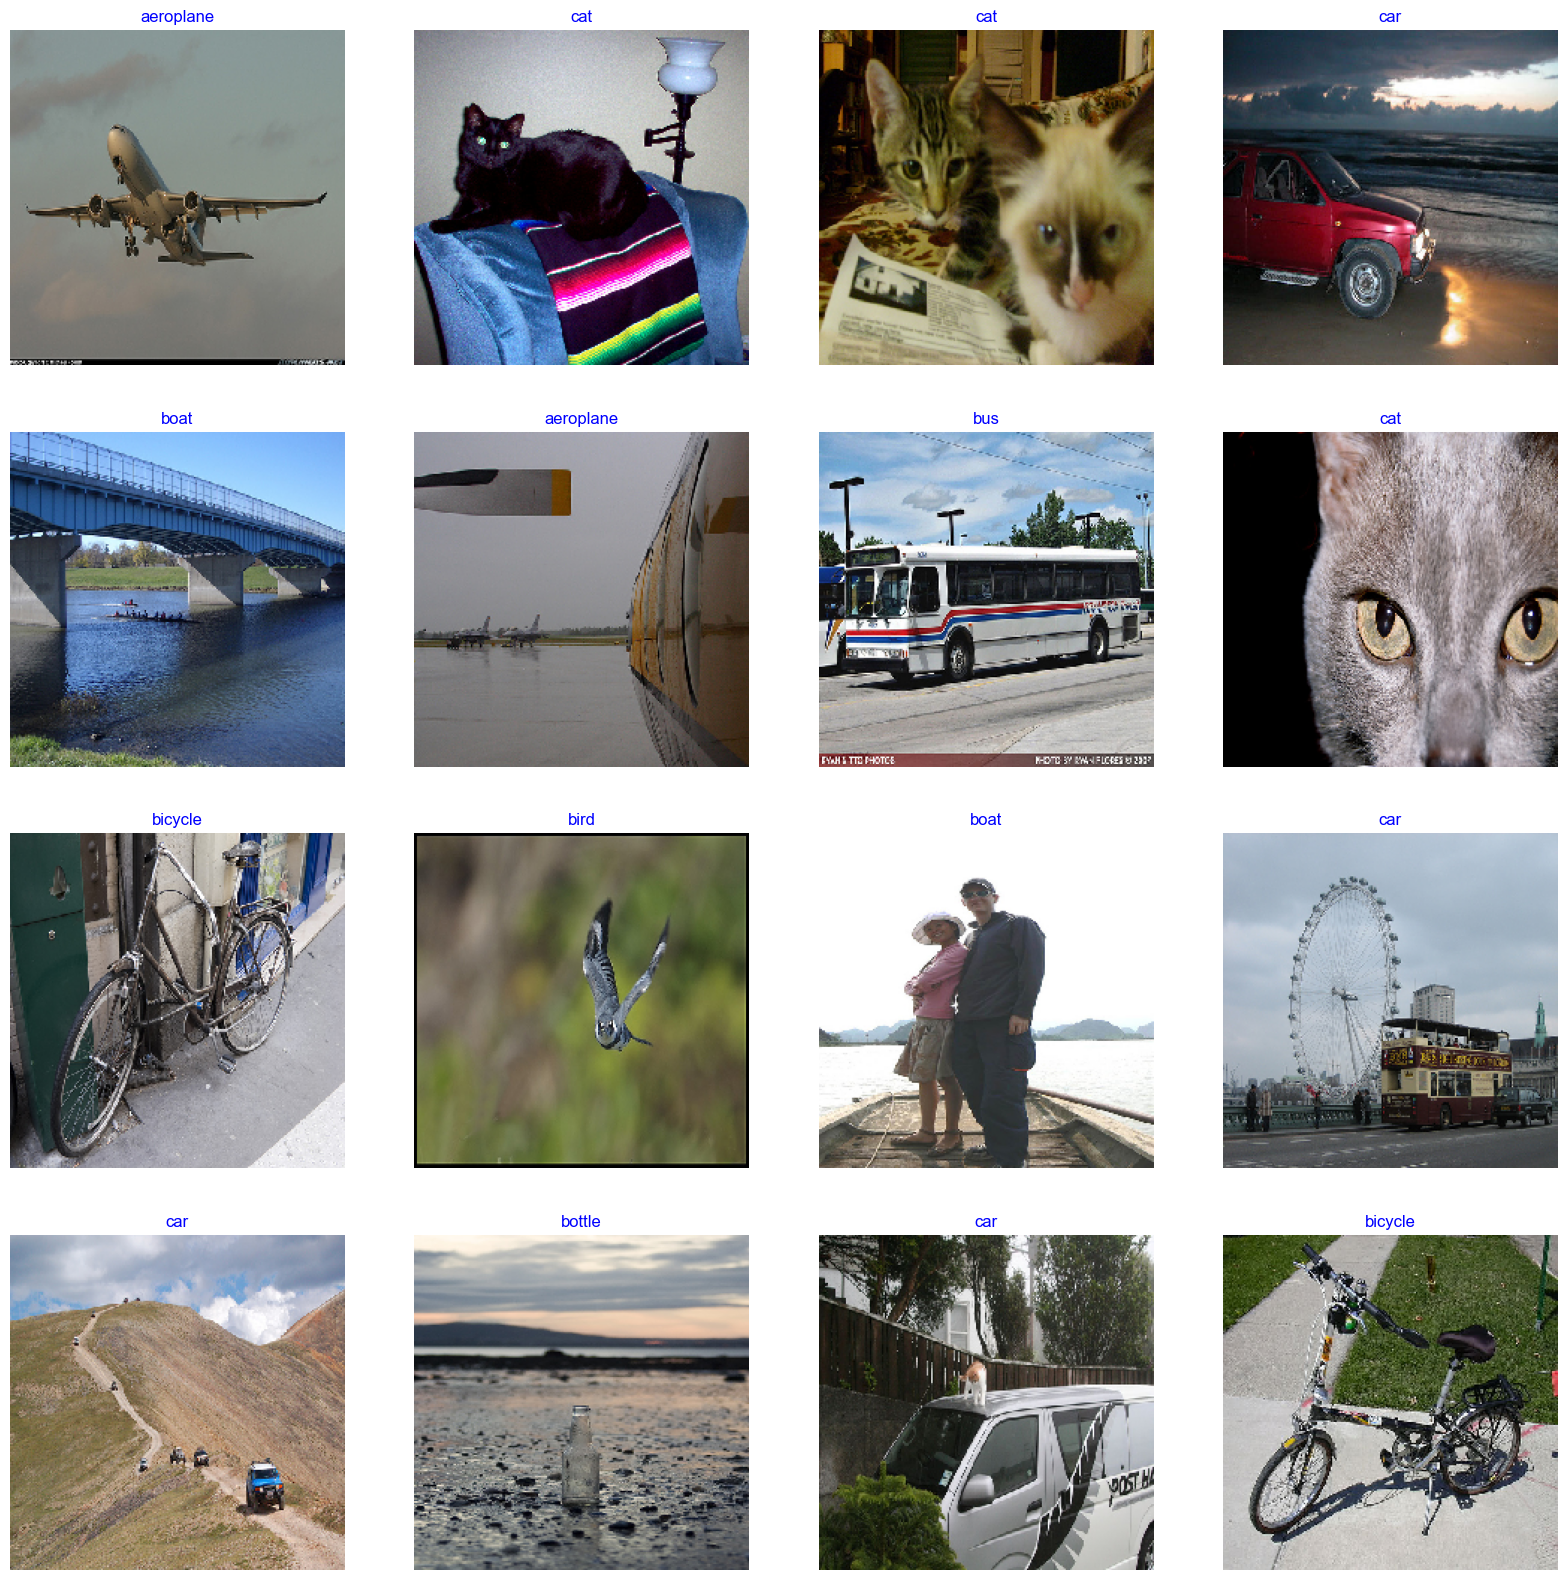

In [10]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

## **Model Structure**

In [11]:
img_size = (224, 224)
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet',input_shape = img_shape, pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l2= 0.016) , activity_regularizer = regularizers.l1(l1=0.006),bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])
model.compile(Adamax(learning_rate = 0.0001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 11185207 (42.67 MB)
Trainable params: 1109

## **Model Training**

In [12]:
import os

In [13]:
import ctypes

def get_cudnn_version():
    libcudnn = ctypes.cdll.LoadLibrary('C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.8\\bin\\cudnn64_8.dll')
    version = ctypes.c_int()
    libcudnn.cudnnGetVersion(ctypes.byref(version))
    return version.value

print("cuDNN version:", get_cudnn_version())

cuDNN version: 0


In [14]:
import ctypes

def get_cudnn_version():
    try:
        # 경로를 실제 cudnn64_X.dll 파일의 경로로 변경하세요
        libcudnn = ctypes.cdll.LoadLibrary('C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.8\\bin\\cudnn64_8.dll')
    except OSError as e:
        print("Could not load cuDNN library:", e)
        return -1

    # cudnnGetVersion의 반환값이 ctypes.c_ulong임을 명시적으로 지정
    libcudnn.cudnnGetVersion.restype = ctypes.c_ulong

    try:
        version = libcudnn.cudnnGetVersion()
        return version
    except AttributeError as e:
        print("Could not find cudnnGetVersion function:", e)
        return -1

print("cuDNN version:", get_cudnn_version())

cuDNN version: 8904


In [15]:
import tensorflow as tf

try:
    cudnn_version = tf.sysconfig.get_build_info()["cudnn_version"]
    print("cuDNN version:", cudnn_version)
except KeyError:
    print("cuDNN version information not found.")

cuDNN version information not found.


In [16]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


Num GPUs Available:  0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4200677016967880877
xla_global_id: -1
]


In [18]:
Epochs = 20
save_dir = 'saved'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

#if os.path.exists(f'{save_dir}/best_model_weights.h5'):
# ModelCheckpoint 콜백 설정

# 임시 체크포인트 파일 경로
temp_checkpoint_path = f'{save_dir}/best_model_weights.keras'

checkpoint = ModelCheckpoint(temp_checkpoint_path, save_best_only=True, monitor='val_loss', mode='min')
history = model.fit(x= train_gen , epochs = Epochs, verbose = 1, validation_data= valid_gen,validation_steps = None , shuffle = False, callbacks=[checkpoint])

# .keras 파일을 .tf 파일로 변환하여 저장
#best_model = tf.keras.models.load_model(temp_checkpoint_path)
#best_model.save(f'{save_dir}/best_model_weights.tf')

Epoch 1/20
153/153 [==============================] - ETA: 0s - loss: 8.6063 - accuracy: 0.6652

ValueError: The following argument(s) are not supported with the native Keras format: ['options']

## **Evaluation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 트레인 데이터 augmentation 의로 데이터를 증가 시킴니다.
# 각 이미지의 기본 주소
BASE_PATH = './drive/MyDrive/Colab Notebooks/data/'

train_datagen = ImageDataGenerator(rotation_range=30,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

train_set = train_datagen.flow_from_directory(BASE_PATH + 'train/',
                                              target_size=(224, 224),
                                              batch_size=16,
                                              shuffle=True,
                                              class_mode='categorical')


In [ ]:
# 학습을 완료후에 모델 성능 테스트에 사용할 데이터셋 입니다.

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(BASE_PATH + 'test/',
                                            target_size=(224, 224),
                                            batch_size=16,
                                            shuffle=True,
                                            class_mode='categorical')

In [ ]:
import pickle

# key 와 value 값을 바꾸어 줍니다.
class4 = dict()
for key,value in test_set.class_indices.items():
    class4[value] = key

with open(BASE_PATH+'bin/class4.pickle', 'wb') as f:
    pickle.dump(class4, f)

In [ ]:
class4

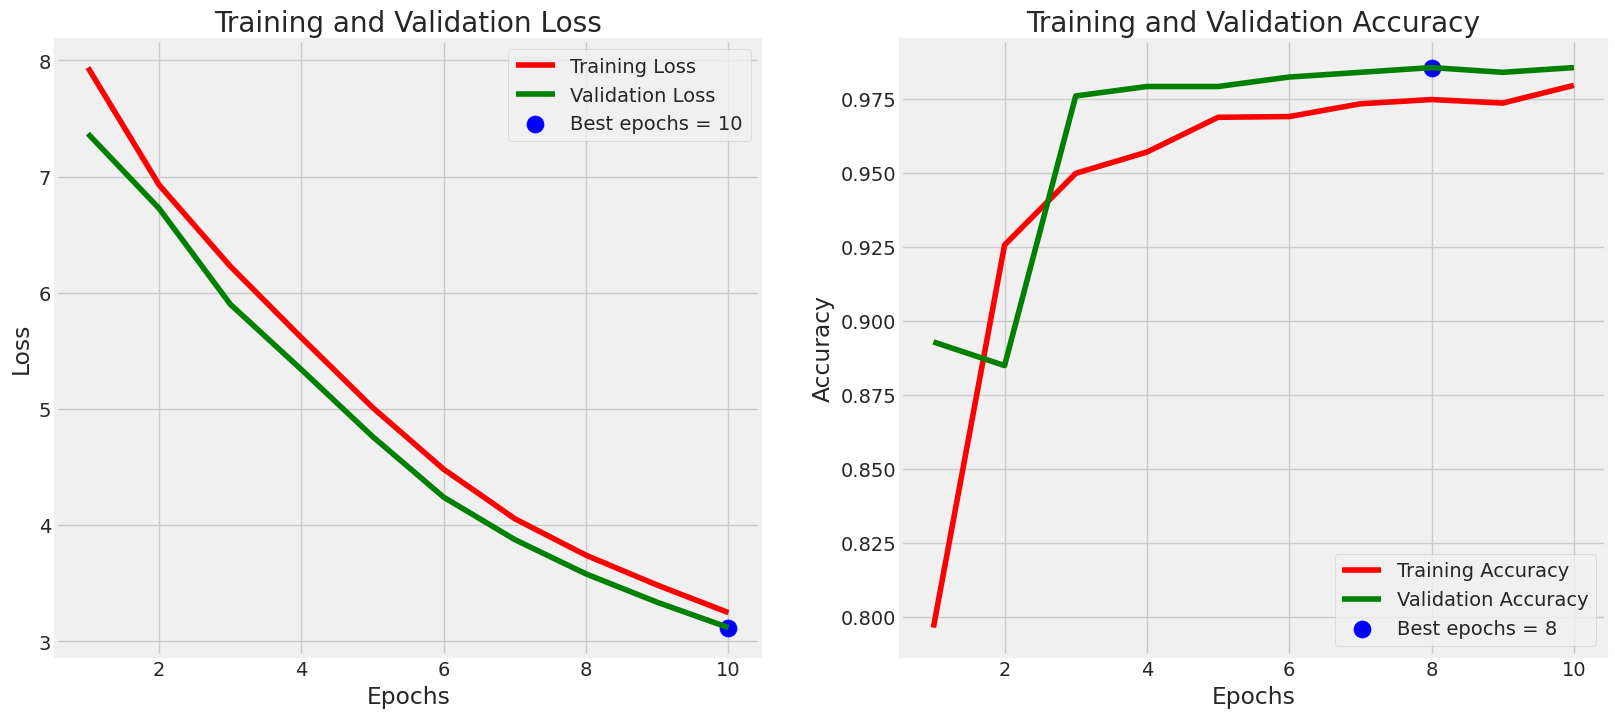

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [ ]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 [==============================] - 4s 245ms/step - loss: 3.1012 - accuracy: 0.9961
Train Loss:  3.089794635772705
Train Accuracy:  0.99609375
--------------------
Validation Loss:  3.1279563903808594
Validation Accuracy:  0.98046875
--------------------
Test Loss:  3.101221799850464
Test Accuracy:  0.99609375


## **Predictions**

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds , axis = 1)

## **Confusion matrix and Classification report**

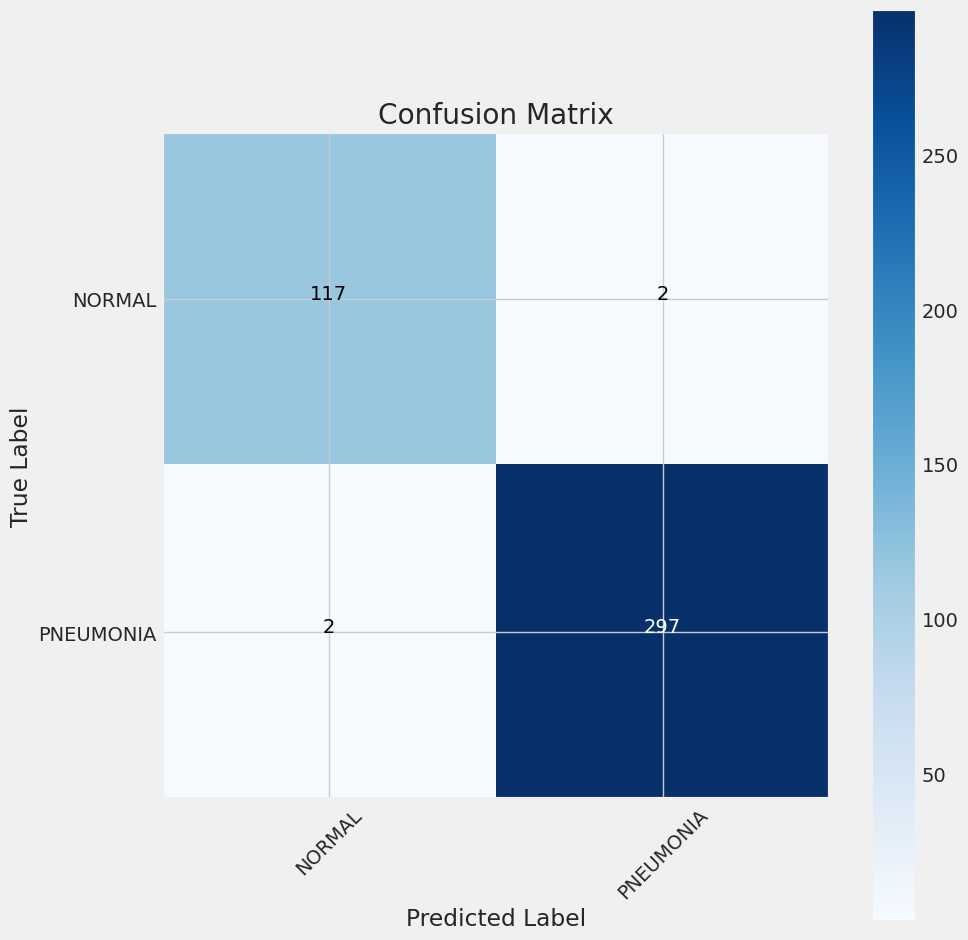

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      NORMAL       0.98      0.98      0.98       119
   PNEUMONIA       0.99      0.99      0.99       299

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418

